# GRADIENT DESCENT OF POLYNOMS
Program that uses gradient descend to find an local extreme of a polynom with one or two variables.
This is then visualized with comparison to the original function.
At the end there are examples of various polynom and you can try even your polynom

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
class Polynom:
    """Representation of a one or two dimensional polynom.

    The initial input should be a string representation of a polynom. Each individual monom has to have this format
        A*x*B*y*C
    A is any rational number; B,C any positive integer or zero, and they should be connected by "+" or "-"
    """
    def __init__(self, polynom: str):
        self.function = polynom
        self.individual_poly = []
        # Highest exponent of x/y
        self.deg_x = 0
        self.deg_y = 0
        self.clean()
        self.cut()
        self.highest_poly()
        self.create_matrix()
        self.gradient()
    
    def clean(self):
        """Basic cleaning of the input string."""
        if self.function[0] != "-":
            self.function = "+" + self.function
        self.function = self.function.lower()
        self.function = self.function.replace(",", ".")
        self.function = self.function.replace("**", "^")
        self.function = self.function.replace(":","/")
        while self.function[-1] in "+-":
            self.function = self.function[:-1]       


    def cut(self):
        """Divides polynom into individual monoms."""
        self.individual_poly = []
        a = 0
        for i in range(1, len(self.function)):
            if self.function[i] in "+-":
                self.individual_poly.append(self.function[a:i])
                a = i
            if i == len(self.function) - 1:
                self.individual_poly.append(self.function[a:i+1])
                      

    def highest_poly(self):
        """Finds monom with highest exponent."""
        for monom in self.individual_poly:
            exponent = 0
            # If there is x it will execute function that returns the monom exponent
            if "x" in monom:
                # Replaces x with k, so that the same function can be used for either variable
                exponent = self.exponent_poly(monom.replace("x","k"))
                # Checks if new exponent is bigger, if so, stores it
                if exponent > self.deg_x:
                    self.deg_x = exponent
            # Same for y
            exponent = 0
            if "y" in monom:
                exponent = self.exponent_poly(monom.replace("y","k"))
                if exponent > self.deg_y:
                    self.deg_y = exponent              
    
    def exponent_poly(self, monom: str):
        """Finds exponent of current monom."""
        a = monom.find("k")
        # If it does not find k, it is constant monom
        if a == -1:
            return 0
        elif a != (len(monom) - 1):
            # If after varible follows ^, it will check for * if there is different variable afterwards
            if monom[a + 1] == "^":
                b = monom[a:].find("*")
                # Returns either the number until the end of the monom or until other variable
                if b == -1:
                    return int(monom[a+2:])
                else:
                    return int(monom[a+2:a+b])
            else:
                return 1
        # If the variable is at the end it is linear monom
        else:
            return 1

    def create_matrix(self):
        """Creates matrix of zeros with the size of exponents including 0.
        In this matrix it stores the constant, where exponent of x is vertical axis and y horizontal."""
        self.matrix = np.zeros((self.deg_x + 1, self.deg_y + 1))

        for monom in self.individual_poly:
            # Checks for variables in monom
            a = monom.find("x")
            b = monom.find("y")
            coordinates = [0, 0]
            # Runs the same find exponent function as previously, which gets stored into coordinates
            if a != -1:                
                exponent = self.exponent_poly(monom.replace("x","k"))
                coordinates[0] = exponent 
            if b != -1:
                exponent = self.exponent_poly(monom.replace("y","k"))
                coordinates[1] = exponent

            # If it is a constant function it stores the nomom
            # The eval function allows to use floats in function
            if a == -1 and b == -1:
                self.matrix[coordinates[0], coordinates[1]] += float(eval(monom))
            
            # Checks if varible x or y is first
            else:                
                if a == -1:
                    a = b
                elif b != -1 and b < a:
                    a = b
                
                # Checks if there is a constant before variable, if not it places 1 there
                # Then it stores the constant into the matrix based on the expone  nts of variables
                if monom[:a] == "+" or monom[:a] == "-":
                    self.matrix[coordinates[0], coordinates[1]] += float(eval(monom[:a] + "1"))    
                else:
                    self.matrix[coordinates[0], coordinates[1]] += float(eval(monom[:a]))

    def calc_grad(self, x: int, y: int):
        """Creates matrix for derivation of polynom based on either x or y.
        
        When using function, set to 1 either x or y for the variable which it is the matrix supposed to be derivated by, the other set to 0.
        The new matrix is always smaller in one direction."""
        grad = np.zeros((self.deg_x +    1 - x, self.deg_y + 1 - y))
        # Goes through matrix and derivates it
        for i in range((self.deg_x - x), -1, -1):
            for j in range(self.deg_y - y, -1, -1):
                # Calculates the derivation
                # The max function makes sure that it is derived only by the neede variable (one of the values in max will always be zero) 
                grad[i][j] = self.matrix[i + x][j + y] * max(((i + 1)*x),((j + 1)*y))
        return grad
    
    def gradient(self):
        """Calculates gradient by x and then y."""
        self.grad_x = self.calc_grad(1, 0)
        self.grad_y = self.calc_grad(0, 1)

    def evaluate_matrix(self, matrix: np.array, x: float = 0, y: float = 0):
        """Calculates the sum of the matrix."""
        result = 0
        dimensions= matrix.shape
        for i in range(dimensions[0]):
            for j in range(dimensions[1]):
                result += matrix[i, j] * x**i * y**j
        return result
    
    def compute_function(self, x: float = 0, y: float = 0):
        """Calculates the value of the polynom at given point."""
        return self.evaluate_matrix(self.matrix, x, y)
    
    def compute_gradient(self, x: float = 0, y: float = 0):
        """Calculates the value of the gradient at given point."""
        return (self.evaluate_matrix(self.grad_x, x, y), self.evaluate_matrix(self.grad_y, x, y))
    


In [3]:
class Gradient_Descent:
    """Calculation and visualization of gradient descent of given polynom.
    
    Input polynom as string, x0 and y0 as first variables, eta as step size, T as number of iterations. Set maximize to True for maximization."""
    def __init__(self, polynom: str, x0: float = 0, y0: float = 0, eta: float = 0.1, T: int = 100, maximize: bool = False):
        self.polynom = Polynom(polynom)
        # Stores the first variables
        self.x = x0
        self.y = y0
        # Stores all the values of variables
        self.xs = [x0]
        self.ys = [y0]
        # Stores the size of a step in gradient
        self.eta = eta
        # Stores the number of iterations
        self.T = T
        # Stores all the results of the polynom
        self.vals = [self.polynom.compute_function(self.x,self.y)]
        # Checks if we want to find maximum or minimum
        if maximize:
            self.sgn = 1
        else:
            self.sgn = -1
        self.run_descent()

    def run_descent(self):
        """Runs gradient descent based on the current parameters.
        
        Can be called multiple times in a row."""
        for t in range(self.T):
            # Computes the size of the derivative
            gx, gy = self.polynom.compute_gradient(self.x,self.y)
            # Calculates the next x,y based on the size of step and gradient
            self.x += self.sgn * self.eta * gx
            self.y += self.sgn * self.eta * gy
            # Stores the new values
            self.xs.append(self.x)
            self.ys.append(self.y)
            self.vals.append(self.polynom.compute_function(self.x,self.y))
        
    def visualize_value(self):
        """Visualizes the gradient values."""
        fig = plt.figure()
        ax = fig.add_subplot()
        ax.plot(self.vals, color="#43FF87", label="Value")
        # Changes graphics, adds text
        fig.patch.set_facecolor("black")
        ax.patch.set_facecolor("black")
        ax.spines["bottom"].set_color("white")
        ax.spines["left"].set_color("white")
        ax.xaxis.label.set_color("white")
        ax.yaxis.label.set_color("white")
        ax.tick_params("both", colors = "white")
        ax.legend(loc="best")
        ax.set_title("Descent iterate values for polynom {}, beginning at ({},{}) with step size {}".format(self.polynom.function, self.xs[0], self.ys[0], self.eta), color="white") 

        
        plt.show()

    def window_size(self, values: list[float], n: int):
        """Creates interval of n points for plotting function around values."""
        a = np.min(values)
        b = np.max(values)
        window = max(b-a,1)
        return np.linspace(a - 0.1*window, b + 0.1*window,n)


    def visualize_iterates(self):
        """Visualizes the original function and gradient descent values."""
        # Checks for number of variables
        if self.polynom.deg_y == 0:
            # Finds the size of the plot
            x = self.window_size(self.xs,1000)
            # Calculates and draws the polynom
            fx = [self.polynom.compute_function(t,self.y) for t in x]
            fig = plt.figure()
            ax = fig.add_subplot()
            ax.plot(x, fx, color="#AF0000", label="Function")
            # Draws the values of gradients
            ax.plot(self.xs, self.vals, ".-", color="#43FF87", label="Iterates")
            # Changes graphics, adds text
            fig.patch.set_facecolor("black")
            ax.patch.set_facecolor("black")
            ax.spines["bottom"].set_color("white")
            ax.spines["left"].set_color("white")
            ax.xaxis.label.set_color("white")
            ax.yaxis.label.set_color("white")
            ax.tick_params("both", colors = "white")
            plt.legend()
            plt.title("Descent values for polynom {}, beginning at ({},{}) with step size {}".format(self.polynom.function, self.xs[0], self.ys[0], self.eta), color="white") 
            plt.show()     

        elif self.polynom.deg_x == 0:
            # Finds the size of the plot
            y = self.window_size(self.ys, 1000)
            # Calculates and draws the polynom
            fy = [self.polynom.compute_function(self.x,t) for t in y]
            fig = plt.figure()
            ax = fig.add_subplot()
            ax.plot(y,fy, color="#AF0000", label = "Function")
            # Draws the values of gradients
            ax.plot(self.ys,self.vals, ".-", color="#43FF87", label="Iterates")
            # Changes graphics, adds text
            fig.patch.set_facecolor("black")
            ax.patch.set_facecolor("black")
            ax.spines["bottom"].set_color("white")
            ax.spines["left"].set_color("white")
            ax.xaxis.label.set_color("white")
            ax.yaxis.label.set_color("white")
            ax.tick_params("both", colors = "white")
            plt.legend()
            plt.title("Descent values for polynom {}, beginning at ({},{}) with step size {}".format(self.polynom.function, self.xs[0], self.ys[0], self.eta), color="white") 
            plt.show()

        else:
            # Finds the size of the plot
            x = self.window_size(self.xs,100)
            y = self.window_size(self.ys,100)
            # Calculates the polynom
            X,Y = np.meshgrid(x, y)
            Z = self.polynom.compute_function(X, Y)
            fig = plt.figure()
            # Changes graphics
            ax = fig.add_subplot(projection="3d")
            fig.patch.set_facecolor("black")
            ax.patch.set_facecolor("black")
            ax.spines["bottom"].set_color("white")
            ax.spines["left"].set_color("white")
            ax.xaxis.label.set_color("white")
            ax.yaxis.label.set_color("white")
            ax.tick_params("both", colors = "white")
            # Draws the polynom
            surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=mpl.colormaps["plasma"], linewidth=0, antialiased=False, alpha=0.4)
            fig.colorbar(surf)
            # Draws gradient values
            ax.scatter(self.xs, self.ys, self.vals, color="#43FF87")
            plt.show()

In [4]:
def examples():
    """ List of prepared examples, that can be picked through input """
    
    exampleslist = {
            1: ("x^2", 1, 2, 1.1, 100),
            2: ("-1/3x^3+x^2", 1, 2, 0.3, 100),
            3: ("1/3y**3+y**2", -1.9, 2, 1.1, 100),
            4: ("x**2+y**2", 1, 2, 0.8, 100),
            5: ("x**3+y**2", 1, 2, 0.3, 100),
            6: ("x**2+2/3y**2+x+2", 1, 2, 0.3, 100),
            7: ("x-y**3", 1, 2, 0.001, 100),
            8: ("x-x*y+x**2+xy**2", 1, 2, 0.01, 100),
            9: ("5x**2+y**4+5x", 1, 2, 0.07, 150),
            10:("5x**2*y**3-y**3+5x", 1, 2, 0.001, 170),
    }

    print("""
        Write a number of an example to show the gradient descent of that polynom.
            """)
    for key in exampleslist:
        print(f"\t{key}. {exampleslist[key][0]}")

       
    pick = input()
    if len(pick) > 1:
        if pick[-1] == ".":
            pick = pick[:-1]
    pick = int(pick)
    calc_polynom = Gradient_Descent(*exampleslist[pick])
    return calc_polynom.visualize_iterates()


# CELL WITH EXAMPLES
Run the cell and pick from one of the examples.


        Write a number of an example to show the gradient descent of that polynom.
            
	1. x^2
	2. -1/3x^3+x^2
	3. 1/3y**3+y**2
	4. x**2+y**2
	5. x**3+y**2
	6. x**2+2/3y**2+x+2
	7. x-y**3
	8. x-x*y+x**2+xy**2
	9. 5x**2+y**4+5x
	10. 5x**2*y**3-y**3+5x


 8


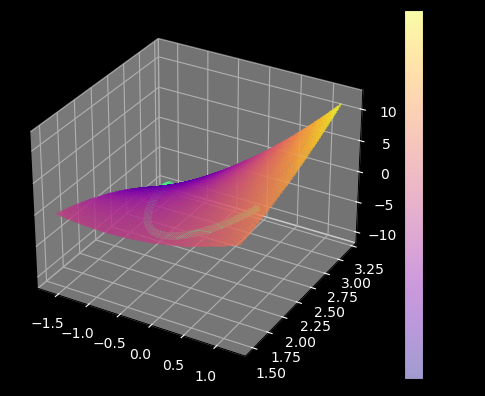

In [7]:
# Try prepared examples
examples()

# ENTER YOUR OWN FUNCTION
You can try your own function, write your function into variable function. You can also change parameters of gradient descent.

Each individual monom has to have this format

        Ax**B*y**C

    A is any rational number; B,C any positive integer or zero, and monoms should be connected by "+" or "-"
    
Legend for variables of gradient descent

(function, starting position of X, starting position of Y, step size, number of iterations)

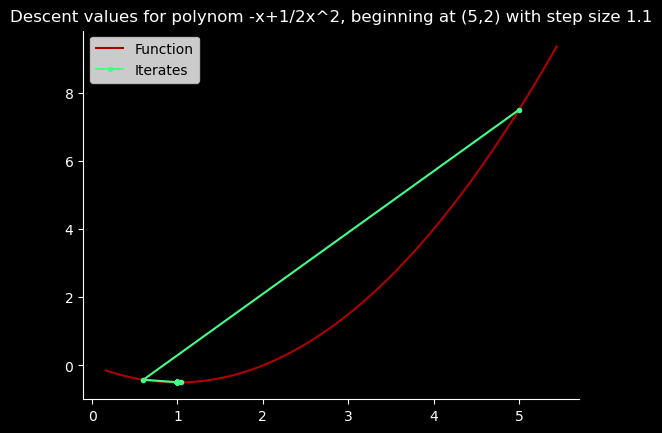

In [6]:
# Calculate own function
function = "-x+1/2x**2"
calc_polynom = Gradient_Descent(function, 5, 2, 1.1, 100)
calc_polynom.visualize_iterates()
